In [11]:
!pip install scikit-learn
!pip install scikit-learn matplotlib
!pip install seaborn


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from data_source import DataSource
from extractor import Extractor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Extraction des données

In [13]:
source = DataSource("./../data.json")
dataframe_list = source.filter([["WC"], ["M"], [], [], ["Q"]], "include", None)
extractor = Extractor(dataframe_list)
athletes = extractor.all_athletes()
athletes_data = {}
for athlete in athletes:
    athletes_data[athlete] = extractor.extract_athlete(athlete)


len(athletes_data)

126

# Création d'un DataFrame utilisable pour le clustering

In [14]:
df_athletes = extractor.create_dataframe_clustering(athletes_data=athletes_data, exceptions=["total_points"])
df_athletes

,ski_points,air_points,time_points,ski_base,ski_deduction_total,top_air_execution,top_air_points,bottom_air_execution,bottom_air_points
SHULDIAKOV Artem,0.705482,0.725745,0.863281,0.892741,0.225761,0.805474,0.784558,0.663884,0.704817
WILSON Bradley,0.913919,0.853567,0.935960,0.931048,0.046709,0.793255,0.772656,0.974955,0.883969
HORISHIMA Ikuma,0.964425,0.953040,0.881841,0.977990,0.044374,0.956598,0.940145,0.967203,0.957246
VARGA Maxence,0.831747,0.776440,0.634142,0.899883,0.099788,0.879765,0.856920,0.930233,0.765786
McDONALD Cole,0.885678,0.941382,0.875545,0.924408,0.069388,0.886697,0.891362,0.854882,0.966524
...,...,...,...,...,...,...,...,...,...
McQUINN George,0.872499,0.972106,0.892114,0.895338,0.051663,0.793744,0.846966,0.918306,0.994150
KOBER Jordan,0.713098,0.863556,0.856406,0.900273,0.225902,0.893842,0.870839,0.810972,0.857777
MURATA Yutaro,0.816484,0.797118,0.854291,0.882203,0.096685,0.780510,0.760242,0.815559,0.809340
LEWIS Alex,0.816715,0.827135,0.736968,0.882353,0.096603,0.762463,0.795378,0.793083,0.836931


# Elbow Method (méthode du coude)
Utilisée pour calculer le meilleur K

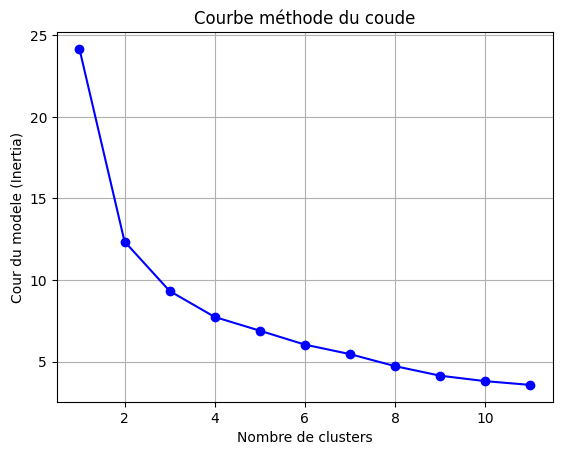

In [15]:
inertia = []
K_range = range(1, 12)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df_athletes)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia, marker="o", color="blue")
plt.xlabel("Nombre de clusters")
plt.ylabel("Cour du modele (Inertia)")
plt.title("Courbe méthode du coude")
plt.grid(1)
plt.show()

# Nettoyage des données (enlever anomalies)

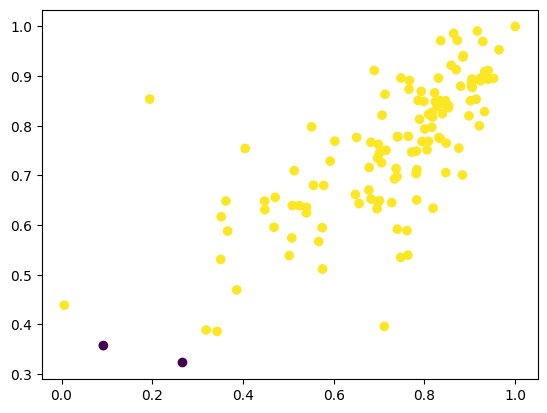

In [16]:
clean_model = IsolationForest(contamination=0.01)
clean_model.fit(df_athletes)
plt.scatter(df_athletes["ski_points"], df_athletes["air_points"], c=clean_model.predict(df_athletes))

# Clustering sur les données

In [17]:
model = KMeans(n_clusters=3)
model.fit(df_athletes)
model.predict(df_athletes)
df_athletes["cluster"] = model.fit_predict(df_athletes)
model.cluster_centers_

array([[0.37659376, 0.4940045 , 0.6337336 , 0.71824562, 0.42265983,
        0.57116325, 0.55041854, 0.49222345, 0.41689611],
       [0.85017196, 0.8625665 , 0.85846059, 0.90587372, 0.08768101,
        0.85585471, 0.86162077, 0.84846648, 0.84539035],
       [0.65306827, 0.68346794, 0.77738829, 0.80942543, 0.19330321,
        0.71742235, 0.70436732, 0.67321848, 0.64574703]])

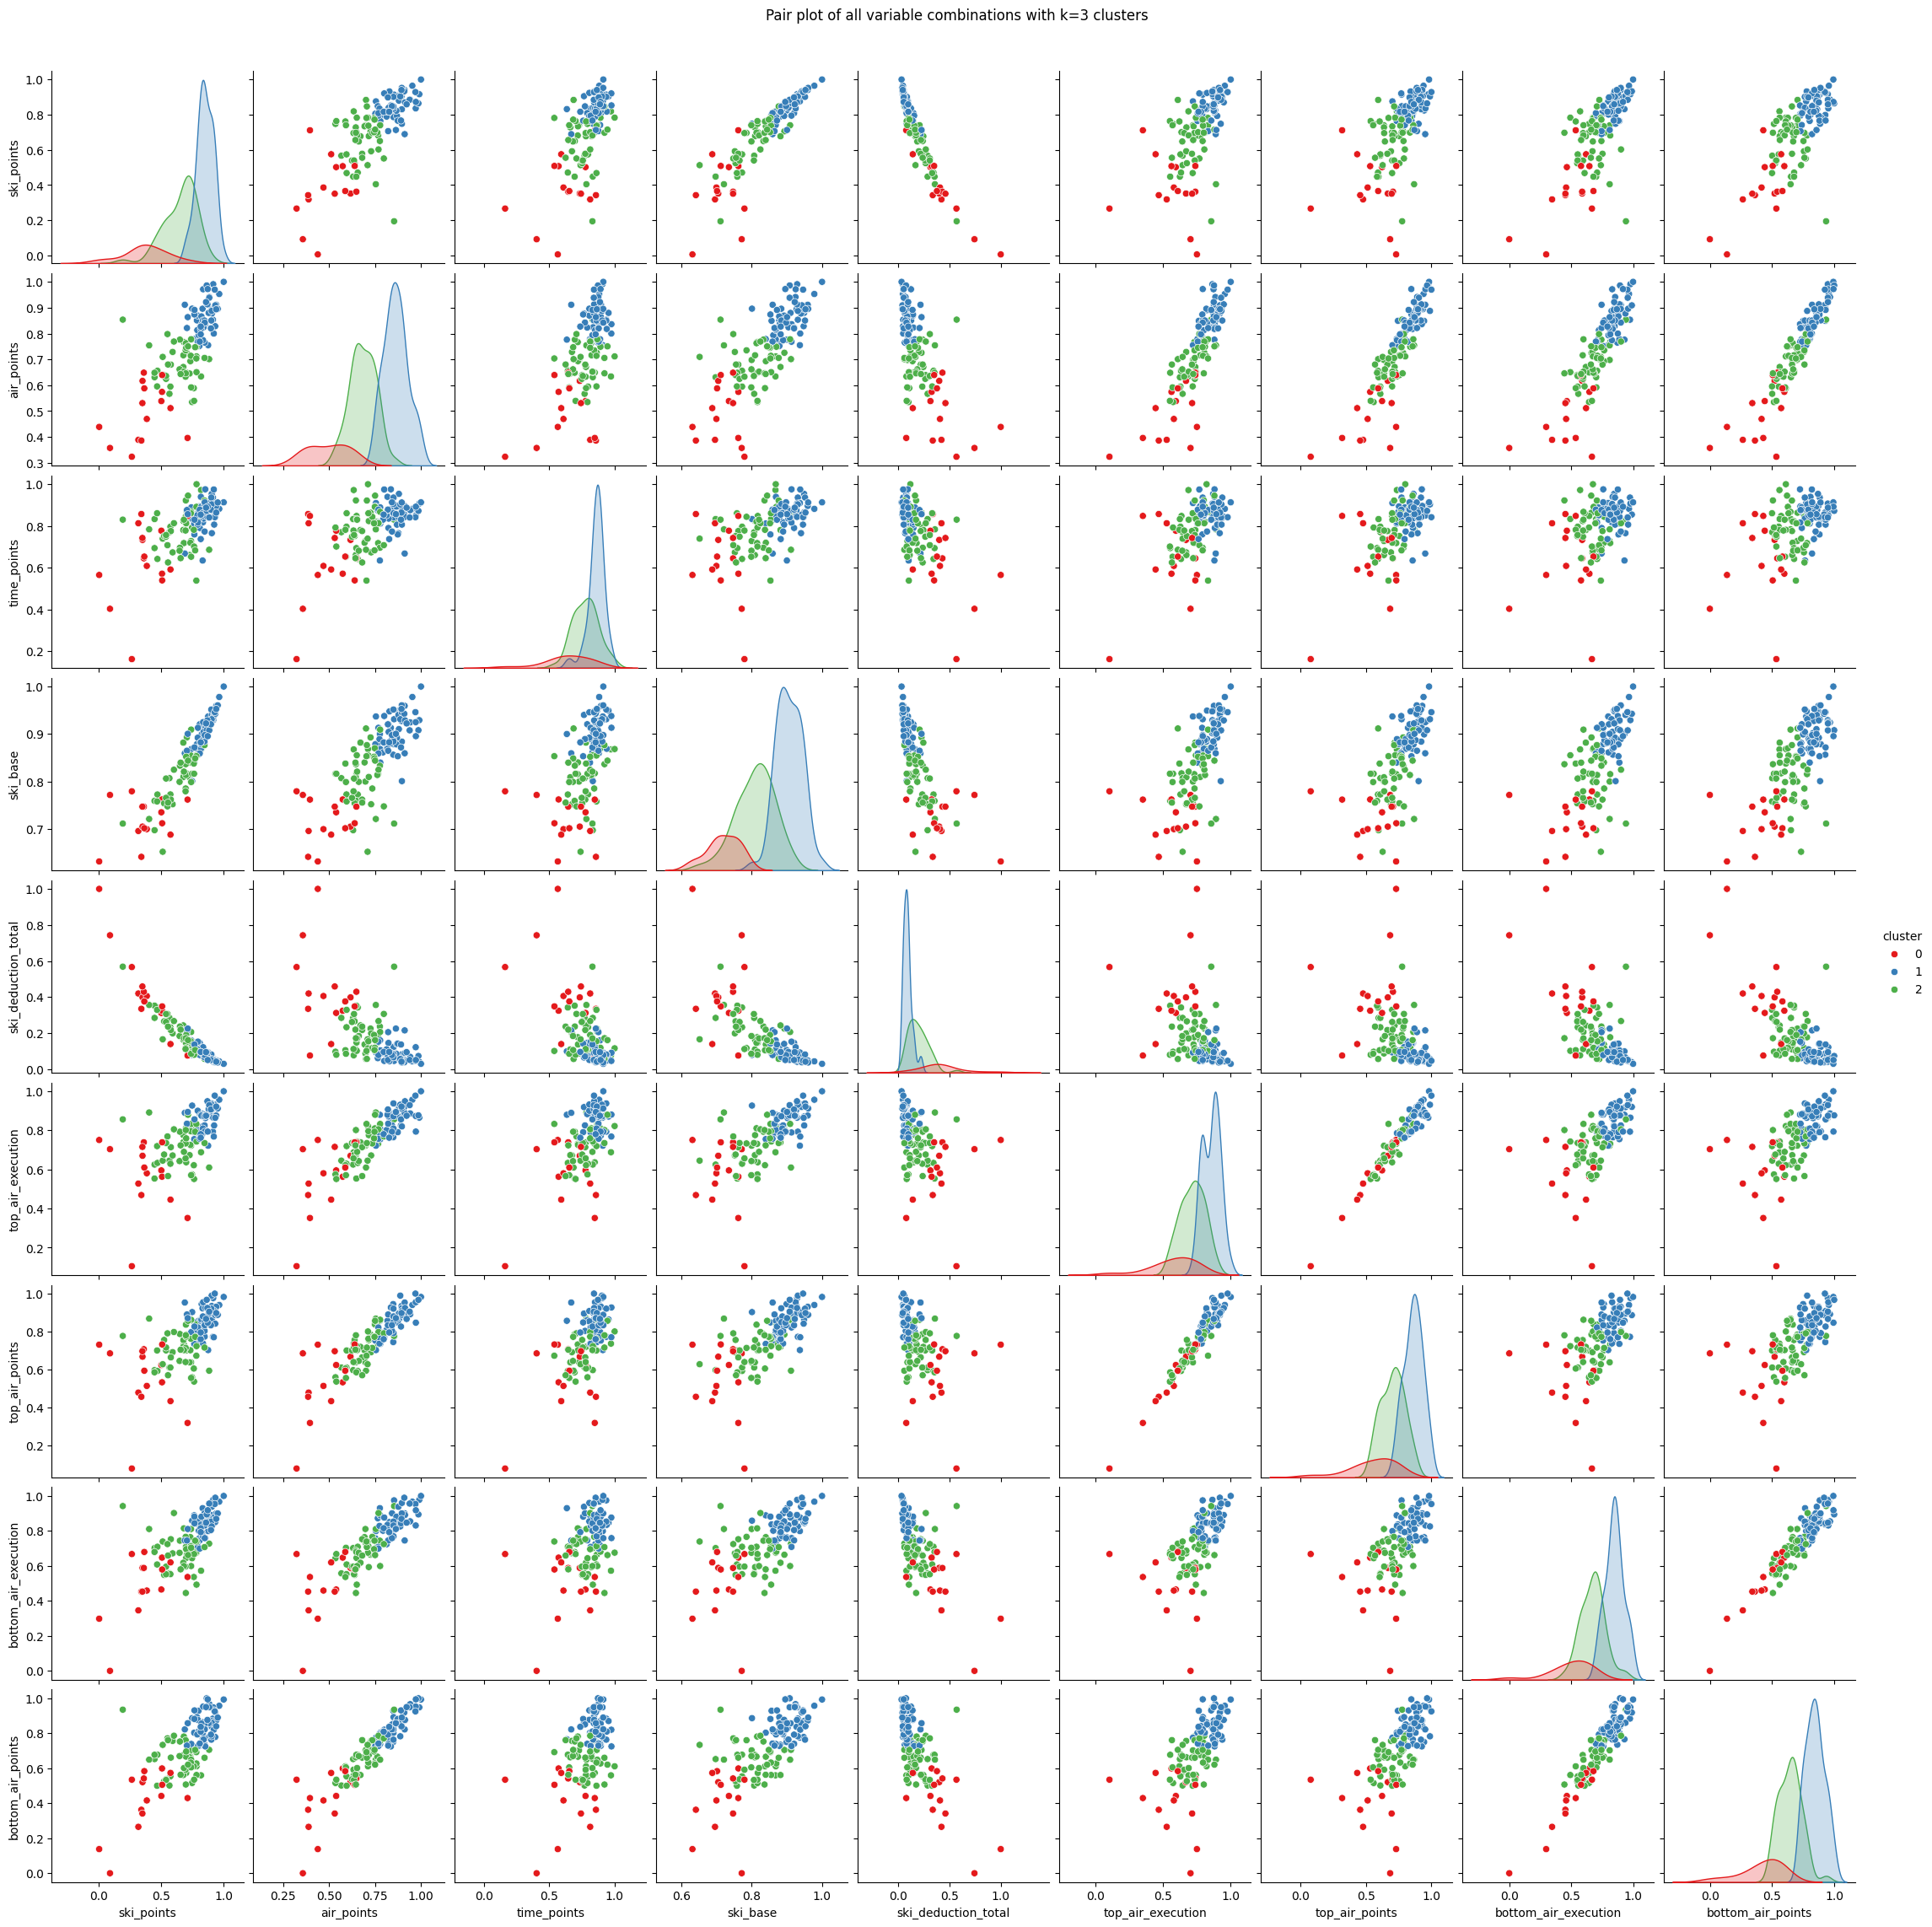

In [18]:
sns.pairplot(df_athletes, hue="cluster", palette="Set1")

# Afficher le plot
plt.suptitle("Pair plot of all variable combinations with k=3 clusters", y=1.02)  # Titre général
plt.show()

# Réduction de la dimension

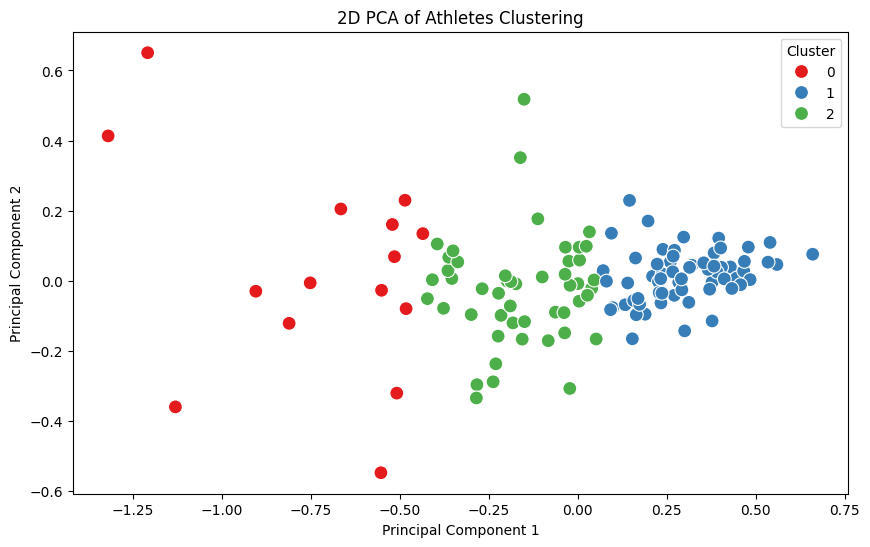

In [19]:
df_athletes_second = df_athletes.drop("cluster", axis=1)

reduct_model = PCA(n_components=2)
athletes_reduced = reduct_model.fit_transform(df_athletes_second)

df_athletes["PCA1"] = athletes_reduced[:, 0]
df_athletes["PCA2"] = athletes_reduced[:, 1]

# Visualisation des clusters dans le nouvel espace 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_athletes, x="PCA1", y="PCA2", hue="cluster", palette="Set1", s=100)

# Ajout de titres et labels
plt.title("2D PCA of Athletes Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [20]:
reduct_model.components_

array([[ 0.45710436,  0.36358912,  0.20976454,  0.17964689, -0.31803184,
         0.28015641,  0.30616717,  0.36443332,  0.42000302],
       [-0.44858691,  0.24958981,  0.00448004, -0.05070042,  0.50730555,
         0.47528732,  0.49984771, -0.02364346,  0.01484597]])